In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Explore the data
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 72.08%


Accuracy: 72.08%
Precision: 0.61
Recall: 0.62
F1 Score: 0.61


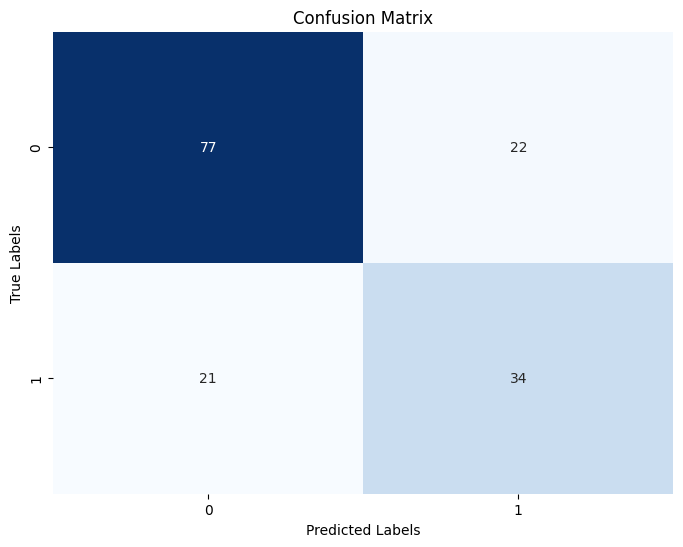

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred)
print(class_report)


In [ ]:
# The below code is representative of the leaves of the decision tree in this model. It shows the condiitonal statements queried of the training data.
tree = model.estimators_[0]

n_nodes = tree.tree_.node_count
children_left = tree.tree_.children_left
children_right = tree.tree_.children_right
feature = tree.tree_.feature
threshold = tree.tree_.threshold

feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

def print_tree(node, depth=0):
    indent = "  " * depth
    if (children_left[node] != children_right[node]): # internal node
        name = feature_names[feature[node]]
        threshold_value = threshold[node]
        print(f"{indent}if {name} <= {threshold_value:.2f}:")
        print_tree(children_left[node], depth+1)
        print(f"{indent}else:  # if {name} > {threshold_value:.2f}")
        print_tree(children_right[node], depth+1)
    else:  # leaf
        print(f"{indent}return {tree.tree_.value[node]}")

print_tree(0)

if BMI <= 30.25:
  if Insulin <= 113.00:
    if Glucose <= 123.00:
      if BMI <= 26.45:
        return [[97.  0.]]
      else:  # if BMI > 26.45
        if DiabetesPedigreeFunction <= 1.03:
          if Pregnancies <= 6.50:
            if DiabetesPedigreeFunction <= 0.37:
              return [[25.  0.]]
            else:  # if DiabetesPedigreeFunction > 0.37
              if Glucose <= 113.00:
                return [[16.  0.]]
              else:  # if Glucose > 113.00
                if BloodPressure <= 70.00:
                  return [[4. 0.]]
                else:  # if BloodPressure > 70.00
                  return [[0. 1.]]
          else:  # if Pregnancies > 6.50
            if Insulin <= 35.50:
              if Age <= 34.50:
                return [[0. 4.]]
              else:  # if Age > 34.50
                if Age <= 40.50:
                  return [[1. 0.]]
                else:  # if Age > 40.50
                  return [[0. 1.]]
            else:  # if Insulin > 35.50
